# **Predicting Air Pollution**
***Air Quality Index of Manila City with 5 different location***\
This project was done together with Gabriel Gary Garcia






# **Executive Summary**
\
Consider the AQI as a scale that ranges from 0 to 500. The higher the AQI value, the more polluted the air is and the greater the health risk. For example, an AQI of 50 or less indicates good air quality, whereas an AQI of 300 or above indicates hazardous air quality.An AQI value of 100 for each pollutant corresponds to an ambient air concentration that meets the short-term national ambient air quality standard for public health protection. AQI scores of 100 or below are generally considered good. Air quality is unhealthy when AQI values exceed 100, initially for specific sensitive groups of people, then for everyone as AQI values rise.\
\
We took data from **openAQ** to look at their pollutant measures as of 2022, specifically `pm10` and `pm25`, which is the main dominant pollutant. We then computed the `AQI_calculation` to give us an idea of the air quality at a specific timestamp. After that, we trained the dataset with different algorithms and found out that each algorithm has a different accuracy in prediction.\
\
We found out that the majority of the air quality index is satisfactory, which is acceptable. However, there may be a risk for some people, particularly those who are unusually sensitive to air pollution. 

# **Introduction**
\
OpenAQ has collected a wealth of data: over 324 million air quality measurements from over ten thousand locations in 68 countries, as well as aggregated data from 114 government level and research-grade sources. Visitors to the website can locate the air quality monitoring sites closest to them, view the NO2, PM2.5 and PM10 levels from those local monitors, and use the data to create graphs, heatmaps, spreadsheets and other tools for analysis. Users can also directly compare air quality in two locations.\
\
`pm1` is Ultrafine particles with an aerodynamic diameter less than 1 micrometers. Ultra-fine dust is the most damaging variant of fine particles because the particles penetrate directly through the lungs into the bloodstream and are thus spread to the organs. `PM10` describes inhalable particles, with diameters that are generally 10 micrometers and smaller. Under the Clean Air Act, EPA sets and reviews national air quality standards for PM. Air quality monitors measure concentrations of PM throughout the country.
`PM25` is defined as particulate matter with a diameter of 2.5 micrometers or less. These particles, which include soot, smoke, metals, chemicals, dust, and other substances, are easily inhaled and have been linked to respiratory disorders. `um010` is the count of Ultrafine particle concentrations `PM1`.`um025` is the count of Ultrafine particle concentrations `PM25`. `um100` is the count of Ultrafine particle concentrations `PM10`

# **Objectives and Metric**
This paper seeks to investigate the air quality index in terms of pollutant PM10 and PM25 in five different locations throughout an open-access air quality: OpenAQ in Manila City. We can collect information for the study by using readily available Application Programming Interfaces (APIs) of these platforms.Performance metrics that will be used in the study are as follows:\
**1. Openaq**


*   `pm10` - PM10 describes inhalable particles, with diameters that are generally 10 micrometers and smaller. The value between 0-50 return as good, whereas the higher value is the more severe the pollution is.
*   `pm25` - Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. The value between 0-30 return as good, whereas the higher value is the more critical to human health.



# **Scope and Problem Statements**
The location includes in this paper are those from within Manila City measuring the air pollution at June 05-06,2022. We would hope to know the air quality Index with an average of 2Mins arrival of time and to train/test a predictive model for future forecasting.\

1. Internal
*   What will be the air `Quality` of five different location within Manila City?
*   Does high value of `pm10` and `pm25` results health issues?
2. External


*   Given the `AQI_calculated` can machine learning techniques be predicted? 	
3. Ranking


*   Among the seven Machine Learning techniques being used, which has the highest accuracy?







# **Methodology**


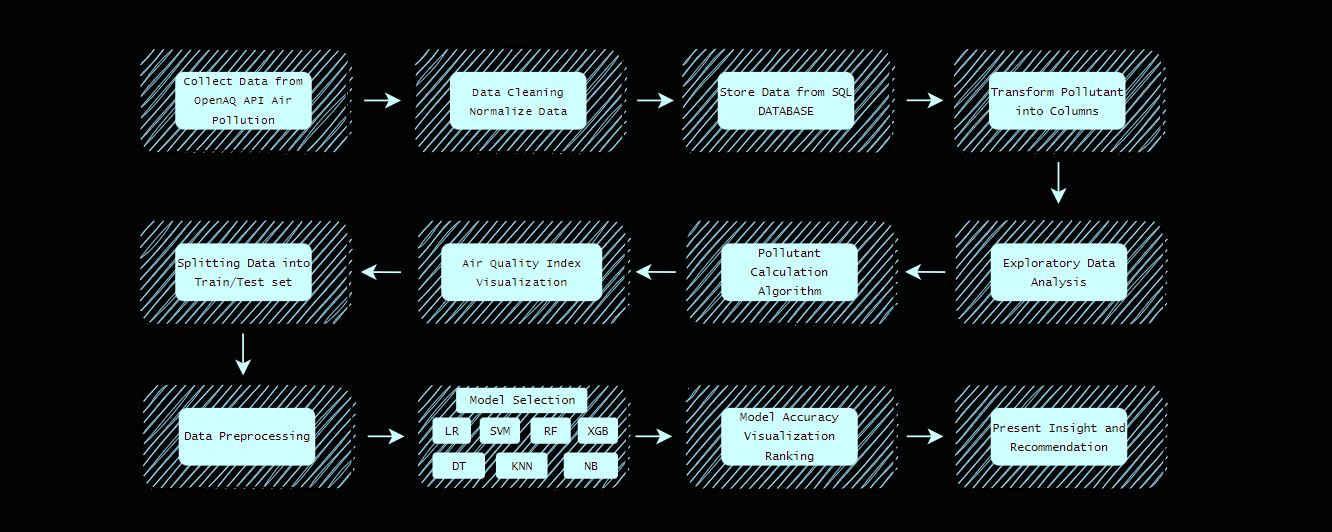

**Importing Libraries**

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import sqlite3
warnings.filterwarnings("ignore")


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
import plotly.io as pio
pio.renderers.default = "colab"
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme="solar")

# **Let's get data from OpenAQ API**
**Philippine Country**

In [ ]:
session = requests.Session()
end_point = 'https://api.openaq.org/v2/countries/PH'
lims = '200'
page = '1'
off = '0'
sorting = 'asc'
orderby = 'country'
parameter = f'limit={lims}&page={page}&offset={off}&sort={sorting}&order_by={orderby}'
opencountry = session.get(f'{end_point}?{parameter}')

In [ ]:
import time
Measure_point = 'https://api.openaq.org/v2/measurements'

date_from = '2022-06-05T00%3A00%3A00%2B00%3A00'
date_to = '2022-06-06T00%3A40%3A00%2B00%3A00'
lims = '15000'
pages = '1'
off = '0'
sorting = 'asc'
rad = '2500'
c_id = 'PH'
ord = 'datetime'

parameter = f'date_from={date_from}&date_to={date_to}&limit={lims}&page={pages}&offset={off}&sort={sorting}&radius={rad}&country_id={c_id}&order_by={ord}'

Measure_PH = session.get(f'{Measure_point}?{parameter}')

time.sleep(0.05)

In [ ]:
Measure_PHK = Measure_PH.json()['results']
PH_MAIN = pd.DataFrame(Measure_PHK)

In [ ]:
PH_MAIN

locationId               location parameter  value  \
0           72329  Multinational Village       pm1  33.30   
1           72329  Multinational Village     um100   0.00   
2           72329  Multinational Village      pm10  54.00   
3           72329  Multinational Village      pm25  45.00   
4           72329  Multinational Village     um010   3.07   
...           ...                    ...       ...    ...   
14995      229080              Westgrove     um010   1.50   
14996      229080              Westgrove       pm1  19.50   
14997      229080              Westgrove      pm25  26.60   
14998      229080              Westgrove     um100   0.00   
14999      229080              Westgrove      pm10  27.50   

                                                    date           unit  \
0      {'utc': '2022-06-05T00:00:37+00:00', 'local': ...          µg/m³   
1      {'utc': '2022-06-05T00:00:37+00:00', 'local': ...  particles/cm³   
2      {'utc': '2022-06-05T00:00:37+00:00', 'local': ...          µg/m³   
3      {'utc': '2022-06-05T00:00:37+00:00', 'local': ...          µg/m³   
4      {'utc': '2022-06-05T00:00:37+00:00', 'local': ...  particles/cm³   
...                                                  ...            ...   
14995  {'utc': '2022-06-05T19:41:44+00:00', 'local': ...  particles/cm³   
14996  {'utc': '2022-06-05T19:41:44+00:00', 'local': ...          µg/m³   
14997  {'utc': '2022-06-05T19:41:44+00:00', 'local': ...          µg/m³   
14998  {'utc': '2022-06-05T19:41:44+00:00', 'local': ...  particles/cm³   
14999  {'utc': '2022-06-05T19:41:44+00:00', 'local': ...          µg/m³   

                                           coordinates country  city  \
0      {'latitude': 14.487228, 'longitude': 121.00152}      PH  None   
1      {'latitude': 14.487228, 'longitude': 121.00152}      PH  None   
2      {'latitude': 14.487228, 'longitude': 121.00152}      PH  None   
3      {'latitude': 14.487228, 'longitude': 121.00152}      PH  None   
4      {'latitude': 14.487228, 'longitude': 121.00152}      PH  None   
...                                                ...     ...   ...   
14995  {'latitude': 14.242084, 'longitude': 121.02017}      PH  None   
14996  {'latitude': 14.242084, 'longitude': 121.02017}      PH  None   
14997  {'latitude': 14.242084, 'longitude': 121.02017}      PH  None   
14998  {'latitude': 14.242084, 'longitude': 121.02017}      PH  None   
14999  {'latitude': 14.242084, 'longitude': 121.02017}      PH  None   

       isMobile isAnalysis     entity       sensorType  
0         False      False  community  low-cost sensor  
1         False      False  community  low-cost sensor  
2         False      False  community  low-cost sensor  
3         False      False  community  low-cost sensor  
4         False      False  community  low-cost sensor  
...         ...        ...        ...              ...  
14995     False       None  community  low-cost sensor  
14996     False       None  community  low-cost sensor  
14997     False       None  community  low-cost sensor  
14998     False       None  community  low-cost sensor  
14999     False       None  community  low-cost sensor  

[15000 rows x 13 columns]

# **Data Cleaning**
**Normalize semi-structured JSON data into a flat table**

In [ ]:
df2 = pd.json_normalize(PH_MAIN['date'])
df3 = pd.json_normalize(PH_MAIN['coordinates'])
df_default = PH_MAIN.join(pd.json_normalize(PH_MAIN.date)).join(pd.json_normalize(PH_MAIN.coordinates))
df_default.drop(columns=['date'],inplace=True)
df_default.drop(columns=['coordinates'],inplace=True)

**Set Datetime**

In [ ]:
AirQ = df_default.rename(columns={'local':'Datetime'})
AirQ['Datetime'] = pd.to_datetime(AirQ['Datetime'])

# **Store the data from SQLITE3 Database**

In [ ]:
conn = sqlite3.connect('AirAQ.db')

In [ ]:
with conn:
  try:
    AirQ.to_sql('openAQ',conn)
  except:
    pass

In [ ]:
query_aq = ''' SELECT Datetime, location, parameter, value 
               FROM openAQ '''
OpenAirQuality = pd.read_sql(query_aq , conn)

**Transform parameters into columns**

In [ ]:
pm1 = OpenAirQuality[OpenAirQuality['parameter']== 'pm1']
pm10 = OpenAirQuality[OpenAirQuality['parameter']== 'pm10']
pm25 = OpenAirQuality[OpenAirQuality['parameter']== 'pm25']
um010 = OpenAirQuality[OpenAirQuality['parameter']== 'um010']
um025 = OpenAirQuality[OpenAirQuality['parameter']== 'um025']
um100 = OpenAirQuality[OpenAirQuality['parameter']== 'um100']

Airparams = pd.DataFrame(pm1)
Airpm10 = pd.DataFrame(pm10)
Airpm25 = pd.DataFrame(pm25)
Airum10 = pd.DataFrame(um010)
Airum25 = pd.DataFrame(um025)
Airum100 = pd.DataFrame(um100)


Airparams['pm1'] = Airparams['value'].values
Airparams['pm10'] = Airpm10['value'].values
Airparams['pm25'] = Airpm25['value'].values
Airparams['um010'] = Airum10['value'].values
Airparams['um025'] = Airum25['value'].values
Airparams['um100'] = Airum100['value'].values

Airparams.drop(['parameter'],axis=1,inplace=True)
Airparams.drop(['value'],axis=1,inplace=True)

Airparams['Datetime'] = pd.to_datetime(Airparams['Datetime']).dt.strftime('%Y-%m-%d %I:%M %p')

AirMainQuality = pd.DataFrame(Airparams)
AirMainQuality.reset_index(drop=True, inplace=True)
AirMainQuality.set_index('Datetime',inplace=True)

#Exploratory Data Analysis

**PARAMETERS**
1.   pm1 - Particulate matter less than 1 micrometer in diameter mass concentration
2.   pm10 - Particulate matter less than 10 micrometers in diameter mass concentration
3.   pm25 - Particulate matter less than 2.5 micrometers in diameter mass concentration
4.   um010 - PM1 count 
5.   um025 - PM2.5 count
6.   um100 - PM10 count



In [ ]:
AirMainQuality.head()

location   pm1  pm10  pm25  \
Datetime                                                                      
2022-06-05 08:00 AM                 Multinational Village  33.3  54.0  45.0   
2022-06-05 08:00 AM                             Westgrove  21.4  30.6  29.1   
2022-06-05 08:01 AM  Lalaan 2 (17.5 Km from Taal volcano)  27.6  57.3  46.0   
2022-06-05 08:01 AM                          8 Forbestown  27.0  49.9  42.0   
2022-06-05 08:01 AM                       Calzada, Taguig  27.5  51.1  41.0   

                     um010  um025  um100  
Datetime                                  
2022-06-05 08:00 AM   3.07   0.16   0.00  
2022-06-05 08:00 AM   1.57   0.05   0.00  
2022-06-05 08:01 AM   4.55   0.45   0.03  
2022-06-05 08:01 AM   3.75   0.00   0.01  
2022-06-05 08:01 AM   3.47   0.23   0.00

In [ ]:
AirMainQuality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 2022-06-05 08:00 AM to 2022-06-06 03:41 AM
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  2500 non-null   object 
 1   pm1       2500 non-null   float64
 2   pm10      2500 non-null   float64
 3   pm25      2500 non-null   float64
 4   um010     2500 non-null   float64
 5   um025     2500 non-null   float64
 6   um100     2500 non-null   float64
dtypes: float64(6), object(1)
memory usage: 156.2+ KB


In [ ]:
AirMainQuality.describe()

pm1        pm10         pm25        um010        um025  \
count  2500.000000  2500.00000  2500.000000  2500.000000  2500.000000   
mean     22.087200    37.87840    32.548720     2.401076     0.117448   
std       7.986675    15.81224    12.259035     1.350855     0.117901   
min       2.600000     4.90000     4.800000     0.100000     0.000000   
25%      18.300000    26.67500    25.400000     1.450000     0.030000   
50%      22.800000    39.30000    34.150000     2.300000     0.080000   
75%      27.300000    48.90000    40.400000     3.010000     0.180000   
max      68.600000   122.20000   113.600000    11.840000     1.210000   

             um100  
count  2500.000000  
mean      0.003764  
std       0.008979  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       0.140000

# **Main Pollutant Calculation**

In [ ]:
#PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

# Air Quality Index
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

# **Location**

**Goal here is to:**
1.   Get the main pollutant pm10 and pm25
2.   Time series every location resample arrival is 2Mins
3.   Average the pollutant every 2Mins
4.   Round the average of pm10 and pm25 to get AQI calculation
5.   Air Quality Index. Masking
                  Good <= 50
                  Satisfactory <= 100
                  Moderate <= 200
                  Poor <= 300
                  Very Poor <= 400
                  Severe > 400






In [ ]:
MultiVil = AirMainQuality[AirMainQuality['location']== 'Multinational Village']
MultiVil.reset_index(inplace=True)
MultiVil['Datetime']=pd.to_datetime(MultiVil['Datetime'])
hourlyMul = MultiVil.resample('2Min',on='Datetime',kind='period').mean().dropna()

In [ ]:
hourlyMul["PM2.5_SubIndex"] = hourlyMul["pm25"].apply(lambda x: get_PM25_subindex(x))
hourlyMul["PM10_SubIndex"] = hourlyMul["pm10"].apply(lambda x: get_PM10_subindex(x))

hourlyMul["AQI_calculated"] = round(hourlyMul[["PM2.5_SubIndex","PM10_SubIndex"]].max(axis = 1))

hourlyMul.loc[hourlyMul["PM2.5_SubIndex"] + hourlyMul["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN

hourlyMul["Quality"] = hourlyMul["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
hourlyMul['location'] = MultiVil['location'].values[20]

col1 = hourlyMul.pop("location")
hourlyMul.insert(0, col1.name, col1)

In [ ]:
pio.renderers.default = "colab"
def max_bar_plot(var):

    x1 = hourlyMul[['location',var]].groupby(["Datetime",'location']).median()\
    .sort_values(by='Datetime',ascending = True).iplot(kind='bar', xTitle='Locations',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,'Air Quality Index('))

p1 = max_bar_plot('pm10')
p1a = max_bar_plot('pm25')

**Westgrove**

In [ ]:
Westgrove = AirMainQuality[AirMainQuality['location']== 'Westgrove']
Westgrove.reset_index(inplace=True)
Westgrove['Datetime']=pd.to_datetime(Westgrove['Datetime'])
hourlyWest = Westgrove.resample('2Min',on='Datetime',kind='period').mean().dropna()

In [ ]:
hourlyWest["PM2.5_SubIndex"] = hourlyWest["pm25"].apply(lambda x: get_PM25_subindex(x))
hourlyWest["PM10_SubIndex"] = hourlyWest["pm10"].apply(lambda x: get_PM10_subindex(x))

hourlyWest["AQI_calculated"] = round(hourlyWest[["PM2.5_SubIndex","PM10_SubIndex"]].max(axis = 1))

hourlyWest.loc[hourlyWest["PM2.5_SubIndex"] + hourlyWest["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN

hourlyWest["Quality"] = hourlyWest["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
hourlyWest['location'] = Westgrove['location'].values[20]

col2 = hourlyWest.pop("location")
hourlyWest.insert(0, col2.name, col2)

In [ ]:
pio.renderers.default = "colab"
def max_bar_plot2(var):

    x1 = hourlyWest[['location',var]].groupby(["Datetime",'location']).median()\
    .sort_values(by='Datetime',ascending = True).iplot(kind='bar', xTitle='Locations',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,'Air Quality Index('))

p2 = max_bar_plot2('pm10')
p2a = max_bar_plot2('pm25')

**Lalaan 2 (17.5 Km from Taal volcano)**

In [ ]:
Lalaan = AirMainQuality[AirMainQuality['location']== 'Lalaan 2 (17.5 Km from Taal volcano)']
Lalaan.reset_index(inplace=True)
Lalaan['Datetime']=pd.to_datetime(Lalaan['Datetime'])
hourlylala = Lalaan.resample('2Min',on='Datetime',kind='period').mean().dropna()

In [ ]:
hourlylala["PM2.5_SubIndex"] = hourlylala["pm25"].apply(lambda x: get_PM25_subindex(x))
hourlylala["PM10_SubIndex"] = hourlylala["pm10"].apply(lambda x: get_PM10_subindex(x))

hourlylala["AQI_calculated"] = round(hourlylala[["PM2.5_SubIndex","PM10_SubIndex"]].max(axis = 1))

hourlylala.loc[hourlylala["PM2.5_SubIndex"] + hourlylala["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN

hourlylala["Quality"] = hourlylala["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
hourlylala['location'] = Lalaan['location'].values[20]

col3 = hourlylala.pop("location")
hourlylala.insert(0, col3.name, col3)

In [ ]:
pio.renderers.default = "colab"
def max_bar_plot3(var):

    x1 = hourlylala[['location',var]].groupby(["Datetime",'location']).median()\
    .sort_values(by='Datetime',ascending = True).iplot(kind='bar', xTitle='Locations',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,'Air Quality Index('))

p3 = max_bar_plot3('pm10')
p3a = max_bar_plot3('pm25')

**8 Forbestown**

In [ ]:
Forbestown = AirMainQuality[AirMainQuality['location']== '8 Forbestown']
Forbestown.reset_index(inplace=True)
Forbestown['Datetime']=pd.to_datetime(Forbestown['Datetime'])
hourlyforb = Forbestown.resample('2Min',on='Datetime',kind='period').mean().dropna()

In [ ]:
hourlyforb["PM2.5_SubIndex"] = hourlyforb["pm25"].apply(lambda x: get_PM25_subindex(x))
hourlyforb["PM10_SubIndex"] = hourlyforb["pm10"].apply(lambda x: get_PM10_subindex(x))

hourlyforb["AQI_calculated"] = round(hourlyforb[["PM2.5_SubIndex","PM10_SubIndex"]].max(axis = 1))

hourlyforb.loc[hourlyforb["PM2.5_SubIndex"] + hourlyforb["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN

hourlyforb["Quality"] = hourlyforb["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
hourlyforb['location'] = Forbestown['location'].values[20]

col4 = hourlyforb.pop("location")
hourlyforb.insert(0, col4.name, col4)

In [ ]:
pio.renderers.default = "colab"
def max_bar_plot4(var):

    x1 = hourlyforb[['location',var]].groupby(["Datetime",'location']).median()\
    .sort_values(by='Datetime',ascending = True).iplot(kind='bar', xTitle='Locations',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,'Air Quality Index('))

p4 = max_bar_plot4('pm10')
p4a = max_bar_plot4('pm25')

**Calzada, Taguig**

In [ ]:
Calta = AirMainQuality[AirMainQuality['location']== 'Calzada, Taguig']
Calta.reset_index(inplace=True)
Calta['Datetime']=pd.to_datetime(Calta['Datetime'])
hourlycal = Calta.resample('2Min',on='Datetime',kind='period').mean().dropna()

In [ ]:
hourlycal["PM2.5_SubIndex"] = hourlycal["pm25"].apply(lambda x: get_PM25_subindex(x))
hourlycal["PM10_SubIndex"] = hourlycal["pm10"].apply(lambda x: get_PM10_subindex(x))

hourlycal["AQI_calculated"] = round(hourlycal[["PM2.5_SubIndex","PM10_SubIndex"]].max(axis = 1))

hourlycal.loc[hourlycal["PM2.5_SubIndex"] + hourlycal["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN

hourlycal["Quality"] = hourlycal["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
hourlycal['location'] = Calta['location'].values[20]

col5 = hourlycal.pop("location")
hourlycal.insert(0, col5.name, col5)

In [ ]:
pio.renderers.default = "colab"
def max_bar_plot5(var):

    x1 = hourlycal[['location',var,'Quality']].groupby(["Datetime",'location','Quality']).median()\
    .sort_values(by='Datetime',ascending = True).iplot(kind='bar', xTitle='Locations',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,'Air Quality Index('))

p5 = max_bar_plot5('pm10')
p5a = max_bar_plot5('pm25')

**Merging multiple dataframe**

In [ ]:
AirQualitymerge = pd.concat([hourlyMul, hourlyWest, hourlylala, hourlyforb, hourlycal])
AirQualityFinal = pd.DataFrame(AirQualitymerge).sort_values('Datetime',ascending=True)

# **AIR QUALITY INDEX**

In [ ]:
pio.renderers.default = "colab"
def max_bar_plot6(var):

    x1 = AirQualityFinal[['location',var,'Quality']].groupby(["Datetime",'location','Quality']).median()\
    .sort_values(by='Datetime',ascending = True).head(500).iplot(kind='bar', xTitle='Locations',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,'Air Quality Index('),colors=["dodgerblue"])

p6 = max_bar_plot6('AQI_calculated')

In [ ]:
AirQualityFinal[~AirQualityFinal.AQI_calculated.isna()].Quality.value_counts().iplot(kind='bar',xTitle='')

In [ ]:
# data preprocessing
from sklearn.preprocessing import StandardScaler
from collections import Counter
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
AirQualityFinal

location   pm1  pm10  pm25  \
Datetime                                                                   
2022-06-05 08:00                 Multinational Village  33.3  54.0  45.0   
2022-06-05 08:00                             Westgrove  21.4  30.6  29.1   
2022-06-05 08:01                       Calzada, Taguig  27.5  51.1  41.0   
2022-06-05 08:01  Lalaan 2 (17.5 Km from Taal volcano)  27.6  57.3  46.0   
2022-06-05 08:01                          8 Forbestown  27.0  49.9  42.0   
...                                                ...   ...   ...   ...   
2022-06-06 03:39                          8 Forbestown  23.0  43.0  36.4   
2022-06-06 03:39  Lalaan 2 (17.5 Km from Taal volcano)  22.5  43.8  36.6   
2022-06-06 03:39                       Calzada, Taguig  30.6  60.1  47.2   
2022-06-06 03:40                             Westgrove  19.5  27.5  26.6   
2022-06-06 03:40                 Multinational Village  22.5  34.1  31.4   

                  um010  um025  um100  PM2.5_SubIndex  PM10_SubIndex  \
Datetime                                                               
2022-06-05 08:00   3.07   0.16   0.00       75.000000           54.0   
2022-06-05 08:00   1.57   0.05   0.00       48.500000           30.6   
2022-06-05 08:01   3.47   0.23   0.00       68.333333           51.1   
2022-06-05 08:01   4.55   0.45   0.03       76.666667           57.3   
2022-06-05 08:01   3.75   0.00   0.01       70.000000           49.9   
...                 ...    ...    ...             ...            ...   
2022-06-06 03:39   2.95   0.00   0.00       60.666667           43.0   
2022-06-06 03:39   2.99   0.22   0.01       61.000000           43.8   
2022-06-06 03:39   4.50   0.35   0.02       78.666667           60.1   
2022-06-06 03:40   1.50   0.05   0.00       44.333333           27.5   
2022-06-06 03:40   1.89   0.05   0.00       52.333333           34.1   

                  AQI_calculated       Quality  
Datetime                                        
2022-06-05 08:00            75.0  Satisfactory  
2022-06-05 08:00            48.0          Good  
2022-06-05 08:01            68.0  Satisfactory  
2022-06-05 08:01            77.0  Satisfactory  
2022-06-05 08:01            70.0  Satisfactory  
...                          ...           ...  
2022-06-06 03:39            61.0  Satisfactory  
2022-06-06 03:39            61.0  Satisfactory  
2022-06-06 03:39            79.0  Satisfactory  
2022-06-06 03:40            44.0          Good  
2022-06-06 03:40            52.0  Satisfactory  

[2500 rows x 11 columns]

# **Splitting Train/Test set**

In [ ]:
y = AirQualityFinal['AQI_calculated']
X = AirQualityFinal.drop(['AQI_calculated','Quality','location','pm1','um010','um025','um100'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
#preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**MODELING**

In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[0 5 0 ... 0 0 0]
 [0 8 0 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


Accuracy of Logistic Regression: 15.2 

              precision    recall  f1-score   support

         9.0       0.00      0.00      0.00         5
        10.0       0.24      1.00      0.38         8
        11.0       0.00      0.00      0.00         6
        12.0       0.00      0.00      0.00         8
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         6
        15.0       0.00      0.00      0.00         4
        16.0       0.23      1.00      0.38         7
        17.0       0.00      0.00      0.00         5
        18.0       0.00      0.00      0.00         2
        19.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         1
        21.0       0.00      0.00      0.00         2
        22.0       0.00      0.00      0.00         2
        2

In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[5 0 0 ... 0 0 0]
 [0 8 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


Accuracy of Naive Bayes model: 92.4 

              precision    recall  f1-score   support

         9.0       1.00      1.00      1.00         5
        10.0       1.00      1.00      1.00         8
        11.0       0.75      1.00      0.86         6
        12.0       1.00      0.62      0.77         8
        13.0       0.00      0.00      0.00         1
        14.0       0.86      1.00      0.92         6
        15.0       0.80      1.00      0.89         4
        16.0       1.00      0.86      0.92         7
        17.0       1.00      1.00      1.00         5
        18.0       1.00      1.00      1.00         2
        19.0       1.00      1.00      1.00         1
        20.0       1.00      1.00      1.00         1
        21.0       1.00      1.00      1.00         2
        22.0       1.00      1.00      1.00         2
        23.

In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[4 1 0 ... 0 0 0]
 [0 8 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Accuracy of Random Forest: 57.4 

              precision    recall  f1-score   support

         9.0       1.00      0.80      0.89         5
        10.0       0.89      1.00      0.94         8
        11.0       0.00      0.00      0.00         6
        12.0       0.00      0.00      0.00         8
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         6
        15.0       0.00      0.00      0.00         4
        16.0       0.07      1.00      0.13         7
        17.0       0.00      0.00      0.00         5
        18.0       0.00      0.00      0.00         2
        19.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         1
        21.0       0.00      0.00      0.00         2
        22.0       0.00      0.00      0.00         2
        23.0   

In [ ]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[0 5 0 ... 0 0 0]
 [0 8 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Accuracy of Extreme Gradient Boost: 67.0 

              precision    recall  f1-score   support

         9.0       0.00      0.00      0.00         5
        10.0       0.44      1.00      0.62         8
        11.0       0.00      0.00      0.00         6
        12.0       0.00      0.00      0.00         8
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         6
        15.0       0.00      0.00      0.00         4
        16.0       0.64      1.00      0.78         7
        17.0       1.00      1.00      1.00         5
        18.0       0.00      0.00      0.00         2
        19.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         1
        21.0       0.00      0.00      0.00         2
        22.0       0.00      0.00      0.00         2
      

In [ ]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[4 1 0 ... 0 0 0]
 [0 8 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


Accuracy of K-NeighborsClassifier: 77.8 

              precision    recall  f1-score   support

         9.0       1.00      0.80      0.89         5
        10.0       0.89      1.00      0.94         8
        11.0       0.75      1.00      0.86         6
        12.0       1.00      0.75      0.86         8
        13.0       0.50      1.00      0.67         1
        14.0       1.00      0.83      0.91         6
        15.0       1.00      1.00      1.00         4
        16.0       1.00      1.00      1.00         7
        17.0       0.71      1.00      0.83         5
        18.0       0.00      0.00      0.00         2
        19.0       0.00      0.00      0.00         1
        20.0       0.25      1.00      0.40         1
        21.0       0.00      0.00      0.00         2
        22.0       1.00      1.00      1.00         2
       

In [ ]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[0 5 0 ... 0 0 0]
 [0 8 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Accuracy of DecisionTreeClassifier: 76.2 

              precision    recall  f1-score   support

         9.0       0.00      0.00      0.00         5
        10.0       0.62      1.00      0.76         8
        11.0       0.50      1.00      0.67         6
        12.0       0.00      0.00      0.00         8
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         6
        15.0       0.31      1.00      0.47         4
        16.0       1.00      1.00      1.00         7
        17.0       0.62      1.00      0.77         5
        18.0       0.00      0.00      0.00         2
        19.0       0.00      0.00      0.00         1
        20.0       0.10      1.00      0.18         1
        21.0       0.00      0.00      0.00         2
        22.0       0.00      0.00      0.00         2
      

In [ ]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[0 5 0 ... 0 0 0]
 [0 8 0 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


Accuracy of Support Vector Classifier: 35.8 

              precision    recall  f1-score   support

         9.0       0.00      0.00      0.00         5
        10.0       0.30      1.00      0.46         8
        11.0       0.00      0.00      0.00         6
        12.0       0.00      0.00      0.00         8
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         6
        15.0       0.00      0.00      0.00         4
        16.0       0.26      1.00      0.41         7
        17.0       0.00      0.00      0.00         5
        18.0       0.00      0.00      0.00         2
        19.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         1
        21.0       0.00      0.00      0.00         2
        22.0       0.00      0.00      0.00         2
   

# **Model Accuracy Ranking**

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
ModelEvs = model_ev.set_index('Model').sort_values('Accuracy',ascending=True)
ModelEvs.iplot(kind='barh')

# **Insights, Conclusion and Recommendations**

Since air pollution is a worldwide problem nowadays, the government should focus on implementing laws regarding air quality management programs using the data that we have in our API platform, which aims to address the Filipino people about the status of air quality in Manila City. Although we cannot stop air pollution, our proposed solution is to minimize the burning of fossil fuels and use renewable resources. \

\
We found out that during model evaluation the algorithm with the highest accuracy in prediction is Naive Bayes given the 92.4% of accuracy and for future works, we can forecast future Air Quality using this model.\
\
For further studies on the air quality pollution on various platforms, we recommend that the model should go through hyperparameter tuning to find the best parameters giving the best performance of the model.


# **Referrence**



1.   Time series can be represented using either plotly.express functions (px.line, px.scatter, px.bar etc) or plotly.graph_objects charts objects (go.Scatter, go.Bar etc).\
Ref.link: https://plotly.com/python/time-series/
2.  EPA AirWatch uses air quality categories to show the level of air pollutants at our monitoring sites across Victoria.\
Ref.link: https://www.epa.vic.gov.au/for-community/monitoring-your-environment/about-epa-airwatch/calculate-air-quality-categories#:~:text=To%20calculate%20an%20air%20quality,air%20quality%20guideline%20or%20standard.
3.  2022 C40 Cities Climate Leadership Group, Inc. All rights reserved. | The C40 Knowledge Hub uses cookies to distinguish visitors and provide a better user experience.\
Ref.link: https://www.c40knowledgehub.org/s/topic/0TO1Q0000001lRUWAY/health-impacts-of-air-pollution?language=en_US
4.  Katharina Buchholz,Mar 16, 2021 How Air Quality Compares in Asia\
Ref.link: https://www.statista.com/chart/24430/air-quality-asia/ 
5.  Since its founding in 1963, IQAir has been a global leader and operates in more than 100 countries worldwide.\
Ref.link: https://www.iqair.com/us/blog/air-quality/pm10\
6.The U.S. AQI is EPA’s index for reporting air quality.\
Ref.link: https://www.airnow.gov/aqi/aqi-basics/\
7.022 C40 Cities Climate Leadership Group, Inc. All rights reserved.\
Ref.link: https://www.c40knowledgehub.org/s/article/OpenAQ?language=en_US


In [ ]:
#OpenAirQuality['pm1'] = OpenAirQuality.loc[((OpenAirQuality['parameter']== 'pm1')&(OpenAirQuality['value']>=0))]

#OpenAirQuality.loc[((OpenAirQuality['parameter']== 'pm1')&(OpenAirQuality['value'] >= 50)),'Quality'] = 'Good'